In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
Ai_Brain = Sequential(
    [
        Dense(units = 9, activation= 'relu',input_shape=[8]),
        Dense(units= 9, activation= 'relu'),
        Dense(units=4)
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Ai_Brain.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              81 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              40 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('MyMLData').sheet1


rows = worksheet.get_all_values()


df = pd.DataFrame(rows[1:], columns=rows[0])

df.head()

,input,output
0,5,1
1,10,7
2,15,8
3,20,4
4,25,8


In [ ]:
df=df.astype({'input':'float64'})
df=df.astype({'output':'float64'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   20 non-null     float64
 1   output  20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X=df.iloc[:,:-1].values
y=df[['output']].values

In [ ]:
X.shape

(20, 1)

In [ ]:
y.shape

(20, 1)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:

scaler=MinMaxScaler()


In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1=scaler.fit_transform(X_train)

In [ ]:
Ai_Brain = Sequential(
    [
        Dense(units =3 , activation= 'relu',input_shape=[1]),
        Dense(units= 3, activation= 'relu'),
        Dense(units=1)
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Ai_Brain.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Ai_Brain.compile(optimizer='rmsprop', loss='mean_squared_error')

In [ ]:
Ai_Brain.fit(X_train1,y_train,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step - loss: 31.3659
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 31.2142
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 31.1057
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 31.0198
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 30.9477
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 30.8817
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 30.8212
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 30.7655
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 30.7143
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 30.6671


In [ ]:
loss_df = pd.DataFrame(Ai_Brain.history.history)

<Axes: >

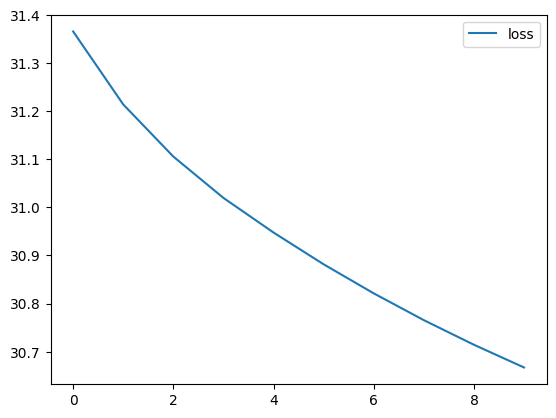

In [ ]:
loss_df.plot()


In [ ]:
X_test1=scaler.fit_transform(X_test)

In [ ]:
Ai_Brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 18.3119


18.311880111694336

In [ ]:
X_n1=[[3]]

In [ ]:
X_n1=scaler.fit_transform(X_n1)

In [ ]:
Ai_Brain.predict(X_n1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.01728841]], dtype=float32)

In [ ]:
x_n1=[[20]]

In [ ]:
X_n1=scaler.fit_transform(X_n1)

In [ ]:
Ai_Brain.predict(X_n1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.01728841]], dtype=float32)